<a href="https://colab.research.google.com/github/sujata1606/Final-Year-Project/blob/main/Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [75]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
#categorical encoding using one hot encoding
from sklearn.preprocessing import OneHotEncoder

In [76]:
#Ignore warnings
import warnings
warnings.simplefilter(action ="ignore", category = FutureWarning)

**Load the dataset**

In [77]:
df = pd.read_csv('Electronic Products Data.csv')

In [78]:
df.sample(10)

,Timestamp,Name,Age,howoften,Changecell,Uselaptop,Readlaunches,Trynewproduct,Type,Product,Item,Brand(HomeAppliances),Brand(ITDevices),Brand(MobileDevices),Price(HomeAppliances),Price(ITDevices),Price(MobileDevices),Time,Where,Compareprices,Research,"Timespend(10,000 - 30,000)","Timespend(30,000 - 50,000)","Timespend(50,000 - 70,000)","Timespend(70,000 - 1,00,000)",Yearlyspending,Factors,Productfeatures,Easeofuse,Warranty,Recommendationfromsomeone,Salespersonrecommendation,NoUseproduct,Rating,Review
102,4/20/2021 0:13,Dipka,25-35,Regularly,Rarely,Rarely,Sometimes,Sometimes,New,Home appliances,Refrigerator,Whirlpool,HP,Moto,"50,000 - 60,000","30,000 - 40,000","20,000 - 30,000",During the sale,Online,Yes,Ask a friend/colleague/family member for their...,2 - 4 days,5-10 days,2 - 4 weeks,1-3 months,"40,000 - 60,000","Reliability of a product, Quality of a product",Very important,Very important,Moderately important,Moderately important,Moderately important,Sell on as second-hand,4,Thanks for taking feedback
190,4/27/2021 19:36,Santosh,50 and above,Regularly,Rarely,Sometimes,Never,Never,New,Mobile devices,Smartphone,Whirlpool,Lenovo,Moto,"40,000 - 50,000","30,000 - 40,000","20,000 - 30,000",During the sale,"Online, In the exclusive brand store",Yes,Ask a friend/colleague/family member for their...,2 - 4 days,5-10 days,2 - 4 weeks,1-3 months,"40,000 - 60,000","Reliability of a product, Pricing of a product...",Very important,Extremely important,Moderately important,Not at all important,Not at all important,Sell on as second-hand,5,Good
146,4/25/2021 12:37,Mandar,18-25,Regularly,Sometimes,Very Often,Sometimes,Very Often,New,IT Devices,Desktop,Whirlpool,Lenovo,Moto,"40,000 - 50,000","30,000 - 40,000","20,000 - 30,000",During the sale,Online,Yes,"Read online reviews, Compare them with competi...",2 - 4 days,2 - 4 weeks,1-3 months,1-3 months,"40,000 - 60,000","Reliability of a product, Quality of a product",Extremely important,Very important,Extremely important,Moderately important,Not at all important,Sell on as second-hand,4,So good
46,4/1/2021 23:04,Aashish Auti,18-25,Regularly,Very Often,Always,Always,Always,New,Mobile devices,Smartphone,LG,Dell,Realme,"10,000 - 20,000","40,000 - 50,000","60,000 - 70,000",During the sale,Online,Yes,Read online reviews,2 - 4 days,2 - 4 days,5-10 days,5-10 days,"60,000 - 80,000","Reliability of a product, Quality of a product",Extremely important,Extremely important,Extremely important,Moderately important,Moderately important,Take to local recycling center,5,Good product
89,4/17/2021 14:11,Raam jadhav,35-50,Regularly,Always,Sometimes,Rarely,Rarely,New,"Home appliances, Mobile devices","Television, Laptop",LG,Lenovo,Samsung,"60,000 - 70,000","60,000 - 70,000","30,000 - 40,000",During the sale,In an electronics store,Yes,"Read online reviews, Find out brand reputation",Less than 1 day,2 - 4 days,2 - 4 weeks,1-3 months,"60,000 - 80,000","Reliability of a product, Quality of a product",Extremely important,Extremely important,Extremely important,Moderately important,Moderately important,Sell on as second-hand,3,So awesome
107,4/20/2021 0:19,Sejal,18-25,Regularly,Rarely,Rarely,Sometimes,Sometimes,New,IT Devices,Laptop,Whirlpool,Apple,Apple,"60,000 - 70,000","40,000 - 50,000","60,000 - 70,000",During the sale,Online,Yes,Ask a friend/colleague/family member for their...,5-10 days,5-10 days,2 - 4 weeks,1-3 months,"40,000 - 60,000","Reliability of a product, Quality of a product",Very important,Very important,Very important,Moderately important,Moderately important,Take to local recycling center,4,Good one
191,4/27/2021 19:37,Sangita,35-50,Occasionally,Rarely,Sometimes,Rarely,Rarely,Refurbished,Home appliances,Refrigerator,Whirlpool,Lenovo,OnePlus,"50,000 - 60,000","40,000 - 50,000","30,000 - 40,000",During the sale,"In the exclusive brand store, In an electronic...",Yes,Ask a friend/colleague/family member for their...,5-10 days,2 - 4 weeks,1-3 months,1-3 months,"40,000 - 60,000","Reliability of a product, Pric

In [79]:
df.insert(0,'ID',range(1,1+len(df)))

In [ ]:
#length of the data
len(df)

In [ ]:
#check shape of the data
df.shape

In [80]:
#preview dataset
df.head()

,ID,Timestamp,Name,Age,howoften,Changecell,Uselaptop,Readlaunches,Trynewproduct,Type,Product,Item,Brand(HomeAppliances),Brand(ITDevices),Brand(MobileDevices),Price(HomeAppliances),Price(ITDevices),Price(MobileDevices),Time,Where,Compareprices,Research,"Timespend(10,000 - 30,000)","Timespend(30,000 - 50,000)","Timespend(50,000 - 70,000)","Timespend(70,000 - 1,00,000)",Yearlyspending,Factors,Productfeatures,Easeofuse,Warranty,Recommendationfromsomeone,Salespersonrecommendation,NoUseproduct,Rating,Review
0,1,3/30/2021 15:59,Jaypriya,18-25,Occasionally,Rarely,Always,Very Often,Rarely,New,IT Devices,Laptop,LG,Lenovo,Apple,"50,000 - 60,000","40,000 - 50,000","30,000 - 40,000",During the sale,In an electronics store,No,Ask a friend/colleague/family member for their...,2 - 4 days,1-3 months,1-3 months,1-3 months,"20,000 - 40,000",Pricing of a products,Very important,Very important,Very important,Very important,Very important,Sell on as second-hand,4,Nothing
1,2,3/30/2021 17:20,Mahadik simran,18-25,Occasionally,Sometimes,Sometimes,Sometimes,Very Often,New,IT Devices,Smartphone,Samsung,Dell,Nokia,"40,000 - 50,000","30,000 - 40,000","60,000 - 70,000",During the sale,In the exclusive brand store,No,Ask a friend/colleague/family member for his o...,2 - 4 days,5-10 days,2 - 4 weeks,1-3 months,"Less than 10,000",Quality of a product,Extremely important,Extremely important,Extremely important,Extremely important,Extremely important,Sell on as second-hand,2,Want to purchase new
2,3,4/1/2021 17:17,Sahil,25-35,Regularly,Rarely,Always,Always,Rarely,Refurbished,Mobile devices,Smartphone,Whirlpool,Lenovo,OnePlus,"40,000 - 50,000","40,000 - 50,000","20,000 - 30,000",During the sale,In an electronics store,Yes,Compare them with competitive products,Less than 1 day,2 - 4 weeks,2 - 4 weeks,2 - 4 weeks,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Moderately important,Moderately important,Not at all important,Sell on as second-hand,4,Nothing
3,4,4/1/2021 17:39,Sonali,18-25,Occasionally,Sometimes,Always,Always,Sometimes,New,IT Devices,Laptop,Samsung,HP,Samsung,"20,000 - 30,000","20,000 - 30,000","100 - 10,000",During the sale,In an electronics store,Yes,Compare them with competitive products,5-10 days,2 - 4 days,2 - 4 days,Less than 1 day,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Moderately important,Not at all important,Moderately important,Sell on as second-hand,5,Its amazing
4,5,4/2/2021 17:39,Namrata,25-35,Regularly,Very Often,Very Often,Very Often,Very Often,New,IT Devices,Laptop,Whirlpool,HP,Nokia,"30,000 - 40,000","60,000 - 70,000","30,000 - 40,000",Without the sale (Off Season),Online,Yes,Ask a friend/colleague/family member for their...,2 - 4 weeks,2 - 4 weeks,2 - 4 days,5-10 days,"60,000 - 80,000",Pricing of a product,Very important,Moderately important,Moderately important,Moderately important,Not at all important,Take to local recycling center,4,Good


**Dropping the timestamp column**


In [81]:
df.drop(['Timestamp', 'Name','NoUseproduct'],axis=1,inplace=True)

In [82]:
#renaming columns
df.rename(columns ={
                      'index': 'id',
                      'howoften': 'how_often_buy', 
                      'Changecell': 'Change_cell',
                      'Uselaptop' : 'use_laptop',
                      'Readlaunches' : 'Read_product_launches',
                    'Trynewproduct' : 'Try_new_products',
                    'Type': 'Type_of_the_product',
                    'Brand(HomeAppliances)' : 'Brand_of_HomeAppliances',
                    'Brand(ITDevices)' : 'Brand_of_ITdevices',
                    'Brand(MobileDevices)' : 'Brand_of_MobileDevices',
                    'Price(HomeAppliances)' : 'Price_of_HomeAppliances',
                    'Price(ITDevices)' : 'Price_of_ITDevices',
                    'Price(MobileDevices)' : 'Price_of_MobileDevices',
                    'Time ' : 'Which_time_prefer',
                    'Where' : 'Where_do_you_prefer',
                    'Compareprices' : 'Compare_prices',
                    'Timespend(10,000 - 30,000)' : 'Timespend_on_10,000-30,000',
                    'Timespend(30,000 - 50,000)' : 'Timespend_on_30,000-50,000',
                    'Timespend(50,000 - 70,000)' : 'Timespend_on_50,000-70,000',
                    'Timespend(70,000 - 1,00,000)' : 'Timespend_on_70,000-1,00,000',
                    'Yearlyspending' : 'Yearly_spendings',
                    'Productfeatures' : 'Product_features',
                    'Easeofuse' : 'Ease_of_use',
                    'Recommendationfromsomeone' : 'Recommendation_from_someone',
                    'Salespersonrecommendation' : 'Sales_person_recommendation',
                    'NoUseproduct' :'No_use_product'
                     },inplace=True
                )

In [68]:
#gives information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           216 non-null    object
 1   how_often_buy                 216 non-null    object
 2   Change_cell                   216 non-null    object
 3   use_laptop                    216 non-null    object
 4   Read_product_launches         216 non-null    object
 5   Try_new_products              216 non-null    object
 6   Type_of_the_product           216 non-null    object
 7   Product                       216 non-null    object
 8   Item                          216 non-null    object
 9   Brand_of_HomeAppliances       216 non-null    object
 10  Brand_of_ITdevices            216 non-null    object
 11  Brand_of_MobileDevices        216 non-null    object
 12  Price_of_HomeAppliances       216 non-null    object
 13  Price_of_ITDevices  

In [14]:
#Check the number of rows and columns
rows,columns=df.shape
print('Number of rows: ',rows)
print('Number of columns: ',columns)

Number of rows:  216
Number of columns:  32


**Data types of columns**

In [ ]:
df.dtypes

Timestamp                       object
Name                            object
Age                             object
howoften                        object
Changecell                      object
Uselaptop                       object
Readlaunches                    object
Trynewproduct                   object
Type                            object
Product                         object
Item                            object
Brand(HomeAppliances)           object
Brand(ITDevices)                object
Brand(MobileDevices)            object
Price(HomeAppliances)           object
Price(ITDevices)                object
Price(MobileDevices)            object
Time                            object
Where                           object
Compareprices                   object
Research                        object
Timespend(10,000 - 30,000)      object
Timespend(30,000 - 50,000)      object
Timespend(50,000 - 70,000)      object
Timespend(70,000 - 1,00,000)    object
Yearlyspending           

In [15]:
df.describe()

,Rating
count,216.000000
mean,4.152778
std,0.632302
min,2.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


In [16]:
df.describe(include=['object'])

,Age,howoften,Changecell,Uselaptop,Readlaunches,Trynewproduct,Type,Product,Item,Brand(HomeAppliances),Brand(ITDevices),Brand(MobileDevices),Price(HomeAppliances),Price(ITDevices),Price(MobileDevices),Time,Where,Compareprices,Research,"Timespend(10,000 - 30,000)","Timespend(30,000 - 50,000)","Timespend(50,000 - 70,000)","Timespend(70,000 - 1,00,000)",Yearlyspending,Factors,Productfeatures,Easeofuse,Warranty,Recommendationfromsomeone,Salespersonrecommendation,Review
count,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,215
unique,4,2,5,5,5,5,2,8,36,8,8,12,9,7,8,2,10,2,16,5,5,8,5,6,16,4,4,4,4,4,73
top,18-25,Regularly,Rarely,Always,Sometimes,Very Often,New,Home appliances,Smartphone,Whirlpool,Lenovo,Realme,"40,000 - 50,000","30,000 - 40,000","30,000 - 40,000",During the sale,Online,Yes,Ask a friend/colleague/family member for their...,2 - 4 days,5-10 days,2 - 4 weeks,1-3 months,"40,000 - 60,000","Reliability of a product, Quality of a product",Extremely important,Very important,Extremely important,Moderately important,Moderately important,Good
freq,84,117,62,93,64,76,162,68,60,101,102,54,50,50,60,172,62,209,40,102,92,91,139,106,62,103,107,103,148,106,45


**Checking Null Values**

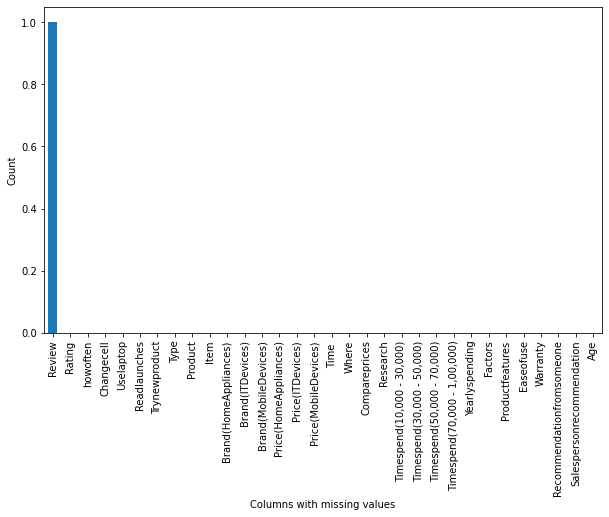

In [18]:
missing=df.isna().sum().sort_values(ascending=False)
missing.plot.bar(figsize=(10,6))
plt.xlabel('Columns with missing values')
plt.ylabel('Count')
plt.show()

In [19]:
missing

Review                          1
Rating                          0
howoften                        0
Changecell                      0
Uselaptop                       0
Readlaunches                    0
Trynewproduct                   0
Type                            0
Product                         0
Item                            0
Brand(HomeAppliances)           0
Brand(ITDevices)                0
Brand(MobileDevices)            0
Price(HomeAppliances)           0
Price(ITDevices)                0
Price(MobileDevices)            0
Time                            0
Where                           0
Compareprices                   0
Research                        0
Timespend(10,000 - 30,000)      0
Timespend(30,000 - 50,000)      0
Timespend(50,000 - 70,000)      0
Timespend(70,000 - 1,00,000)    0
Yearlyspending                  0
Factors                         0
Productfeatures                 0
Easeofuse                       0
Warranty                        0
Recommendation

**Finding Duplicate values**

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
211    False
212    False
213    False
214    False
215    False
Length: 216, dtype: bool

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           216 non-null    object
 1   howoften                      216 non-null    object
 2   Changecell                    216 non-null    object
 3   Uselaptop                     216 non-null    object
 4   Readlaunches                  216 non-null    object
 5   Trynewproduct                 216 non-null    object
 6   Type                          216 non-null    object
 7   Product                       216 non-null    object
 8   Item                          216 non-null    object
 9   Brand(HomeAppliances)         216 non-null    object
 10  Brand(ITDevices)              216 non-null    object
 11  Brand(MobileDevices)          216 non-null    object
 12  Price(HomeAppliances)         216 non-null    object
 13  Price(ITDevices)    

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


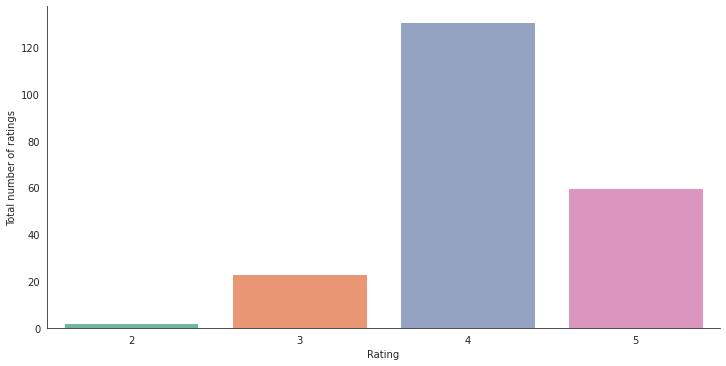

In [62]:
# Check the distribution of the rating
with sns.axes_style('white'):
    R = sns.factorplot("Rating", data=df, aspect=2.0,kind='count', palette='Set2')
    R.set_ylabels("Total number of ratings")


In [57]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(df.Rating.min()))
print('Maximum rating is: %d' %(df.Rating.max()))

Minimum rating is: 2
Maximum rating is: 5


Lets compare the average rating for each product vs the number of people who rated for the product. This will help identify products which have a very high or low rating because of very few ratings received. 

In [52]:
ratings=pd.DataFrame(df.groupby('Product')['Rating'].mean())
ratings['Number_Of_Ratings']=pd.DataFrame(df.groupby('Product')['Rating'].count())
ratings.head()

,Rating,Number_Of_Ratings
Product,,
Earphone,5.000000,1
Home appliances,4.161765,68
"Home appliances, IT Devices",4.000000,2
"Home appliances, IT Devices, Mobile devices",4.714286,7
"Home appliances, Mobile devices",4.000000,11


Let's now check the distribution of count of ratings and the mean ratings

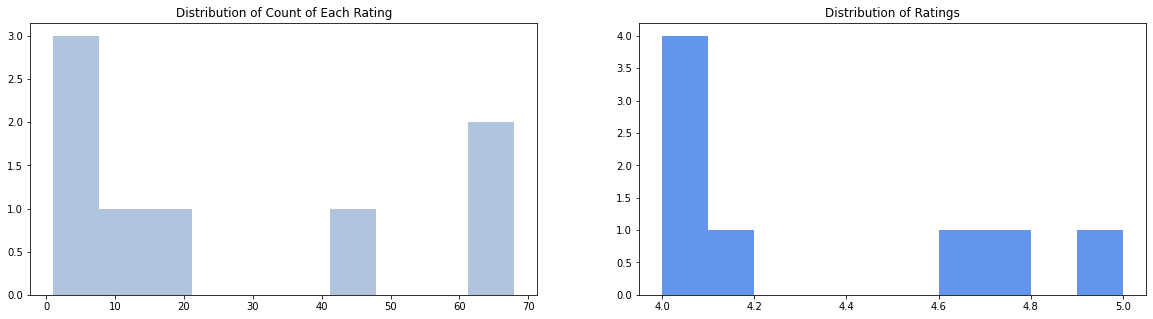

In [50]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(Rating.Number_Of_Ratings, color='lightsteelblue')
plt.title('Distribution of Count of Each Rating')

plt.subplot(1,2,2)
plt.hist(Rating.Rating, color='cornflowerblue')
plt.title('Distribution of Ratings')
plt.show()

In [45]:
Rating.describe()

,Rating,Number_Of_Ratings
count,8.000000,8.000000
mean,4.327336,27.000000
std,0.396944,27.861904
min,4.000000,1.000000
25%,4.023810,5.750000
50%,4.112797,14.000000
75%,4.663866,51.000000
max,5.000000,68.000000


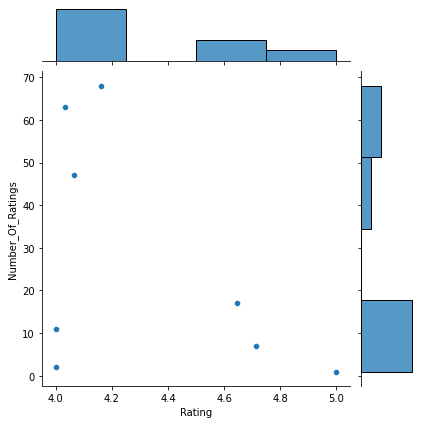

In [49]:
sns.jointplot(Rating.Rating,Rating.Number_Of_Ratings)
plt.show()

Text(0.5, 1.0, 'Distribution of Ratings')

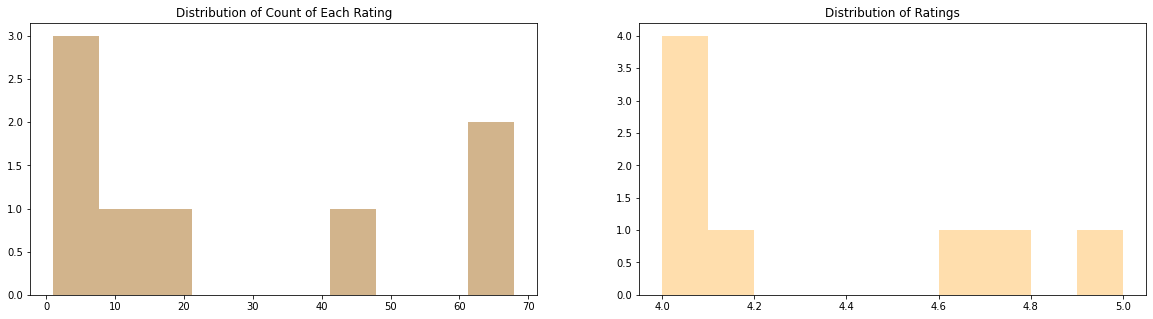

In [56]:
ratings=pd.DataFrame(df.groupby('Product')['Rating'].mean())
ratings['Number_Of_Ratings']=pd.DataFrame(df.groupby('Product')['Rating'].count())

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(ratings.Number_Of_Ratings, color='tan')
plt.title('Distribution of Count of Each Rating')

plt.subplot(1,2,2)
plt.hist(ratings.Rating, color='navajowhite')
plt.title('Distribution of Ratings')

In [83]:
#Check the top 10 users based on ratings
most_rated=df.groupby('ID').size().sort_values(ascending=False)[:10]
print('Top 10 users based on ratings: \n',most_rated)

Top 10 users based on ratings: 
 ID
216    1
68     1
79     1
78     1
77     1
76     1
75     1
74     1
73     1
72     1
dtype: int64
